In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\venky\Downloads\assignment-5\2\All_India_Index_Upto_Feb24.csv')

# Check for missing values
print(df.isnull().sum())

# Forward fill missing values
df.ffill(inplace=True)  # Forward fill

# Or, for backward fill use this instead:
# df.bfill(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Save cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)


Sector                                   0
Year                                     0
Month                                    0
Cereals and products                     3
Meat and fish                            6
Egg                                      3
Milk and products                        3
Oils and fats                            3
Fruits                                   3
Vegetables                               3
Pulses and products                      3
Sugar and Confectionery                  3
Spices                                   3
Non-alcoholic beverages                  3
Prepared meals, snacks, sweets etc.      6
Food and beverages                       3
Pan, tobacco and intoxicants             6
Clothing                                 6
Footwear                                 6
Clothing and footwear                    6
Housing                                122
Fuel and light                           3
Household goods and services             6
Health     

In [11]:
import pandas as pd

# Load the cleaned dataset
cleaned_data = pd.read_csv(r'C:\Users\venky\Downloads\assignment-5\2\cleaned_dataset.csv')

# Display the first few rows of the dataset
print(cleaned_data.head())


        Sector  Year     Month  Cereals and products  Meat and fish    Egg  \
0        Rural  2013   January                 107.5          106.3  108.1   
1        Urban  2013   January                 110.5          109.1  113.0   
2  Rural+Urban  2013   January                 108.4          107.3  110.0   
3        Rural  2013  February                 109.2          108.7  110.2   
4        Urban  2013  February                 112.9          112.9  116.9   

   Milk and products  Oils and fats  Fruits  Vegetables  ...  Housing  \
0              104.9          106.1   103.9       101.9  ...      NaN   
1              103.6          103.4   102.3       102.9  ...    100.3   
2              104.4          105.1   103.2       102.2  ...    100.3   
3              105.4          106.7   104.0       102.4  ...    100.3   
4              104.0          103.5   103.1       104.9  ...    100.4   

   Fuel and light  Household goods and services  Health  \
0           105.5                

In [3]:
# Step 3: Select only the numeric columns for aggregation, excluding 'Year' and 'Sector'
numeric_columns = cleaned_data.drop(columns=['Sector', 'Year', 'Month'])

# Combine 'Year' and 'Sector' columns with numeric data for aggregation
data_for_aggregation = pd.concat([cleaned_data[['Year', 'Sector']], numeric_columns], axis=1)

# Check for missing values (optional)
print(data_for_aggregation.isnull().sum())


NameError: name 'cleaned_data' is not defined

In [4]:
import pandas as pd

# Step 1: Ensure 'Year' column is numeric, coercing errors to NaN
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Step 2: Drop rows where 'Year' or 'Sector' is NaN or non-numeric
df_clean = df.dropna(subset=['Year', 'Sector'])

# Step 3: Ensure 'Year' is integer (optional, depending on your needs)
df_clean['Year'] = df_clean['Year'].astype(int)

# Step 4: Select only numeric columns (excluding 'Year' and 'Sector' for aggregation)
numeric_columns = df_clean.select_dtypes(include='number').drop(columns=['Year'])

# Step 5: Combine 'Year', 'Sector', and numeric columns
data_for_aggregation = pd.concat([df_clean[['Year', 'Sector']], numeric_columns], axis=1)

# Step 6: Group by 'Year' and 'Sector', then calculate the mean for numeric columns
yearly_avg_cpi = data_for_aggregation.groupby(['Year', 'Sector']).mean().reset_index()

# Step 7: Display the results
print("Yearly average CPI values by Sector:")
print(yearly_avg_cpi.head())

# Optional: Save the results into a CSV file
yearly_avg_cpi.to_csv('yearly_avg_cpi.csv', index=False)


Yearly average CPI values by Sector:
   Year       Sector  Cereals and products  Meat and fish         Egg  \
0  2013        Rural            112.950000     112.283333  110.966667   
1  2013  Rural+Urban            114.083333     113.600000  112.208333   
2  2013        Urban            116.516667     116.025000  114.150000   
3  2014        Rural            121.091667     120.733333  118.900000   
4  2014  Rural+Urban            121.783333     122.033333  119.208333   

   Milk and products  Oils and fats      Fruits  Vegetables  \
0         108.883333     106.833333  109.708333  128.766667   
1         108.408333     105.158333  108.875000  133.758333   
2         107.616667     102.275000  107.900000  143.491667   
3         119.700000     110.000000  125.350000  137.425000   
4         119.833333     107.516667  124.791667  139.041667   

   Pulses and products  ...  Clothing and footwear  Fuel and light  \
0           107.150000  ...             110.350000      108.983333   
1    

C:\Users\venky\AppData\Local\Temp\ipykernel_2956\4286004601.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['General index'] = pd.to_numeric(filtered_data['General index'], errors='coerce')


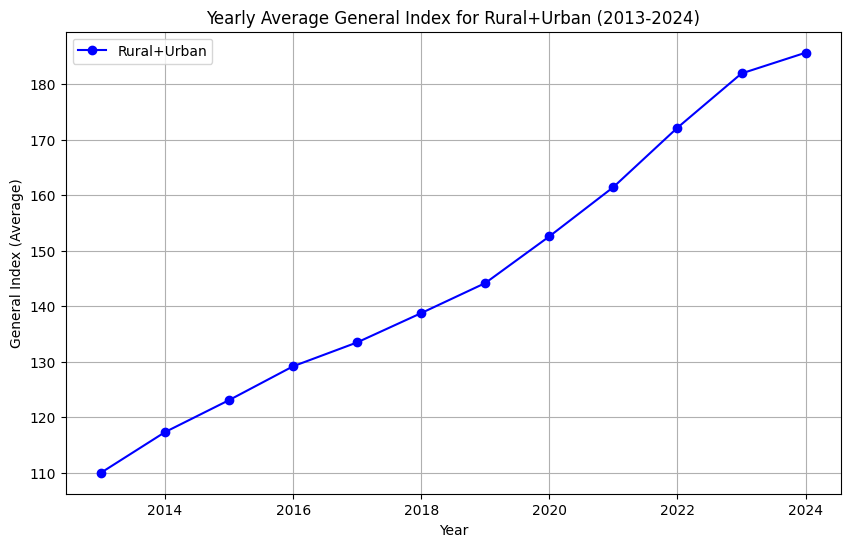

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is loaded into 'df'

# Step 1: Filter data by Sector (choose Rural, Urban, or Rural+Urban)
sector_name = 'Rural+Urban'  # You can change this to 'Rural' or 'Urban'
filtered_data = df[df['Sector'] == sector_name]

# Step 2: Convert the 'General index' column to numeric (if not already)
filtered_data['General index'] = pd.to_numeric(filtered_data['General index'], errors='coerce')

# Step 3: Group the data by 'Year' and calculate the mean of the 'General index'
yearly_avg_general_index = filtered_data.groupby('Year')['General index'].mean().reset_index()

# Step 4: Plot the yearly average 'General index' over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_general_index['Year'], yearly_avg_general_index['General index'], marker='o', color='b', label=sector_name)

# Step 5: Add labels, title, and grid
plt.title(f'Yearly Average General Index for {sector_name} (2013-2024)')
plt.xlabel('Year')
plt.ylabel('General Index (Average)')
plt.grid(True)
plt.legend()
plt.show()
